In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import sys,os
sys.path.append("../..")

In [10]:
from src.models.multi_bin.baseline.model import BaselineMBM
from src.models.multi_bin.lns.model import LnsMBM
from src.models.multi_bin.iterative.model import IterativeMBM

from src.extensions.due_dates.models.production_model import ProductionModel


from src.models.single_bin.anchor.model import AnchorSBM
from src.models.single_bin.baseline.model import BaselineSBM
from src.models.single_bin.guillotine.model import GuillotineSBM


from benchmarks.problem_json import ProblemJsonM

from benchmarks.utils import run_multi_bin_benchmark

In [11]:
import json
f = open(os.path.join(os.getcwd(), "problems", "4_100_400.json"))
data = json.load(f)

In [12]:
solver_models = [IterativeMBM]
production_models = [ProductionModel]
single_bin_models = [GuillotineSBM]

nr_packings = 5
timeout = 60 * 1 # * nr_packings
production_timeout=30
nr_iterations = nr_packings

args = {
    "nr_iterations": nr_iterations,
    "packing_timeout": timeout, 
    "production_timeout": production_timeout
}

In [13]:
problems = [
    (100, 400)
]

nr_item_types = [4, 7, 10]

PROBLEM 4_100_400_1_0
{'widths': [44, 49, 37, 43], 'heights': [43, 94, 72, 54], 'deadlines': [13], 'deadline_counts': [[205], [1], [1], [71]], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400}}
--- CREATING NEW BIN ---
Warning, timeout protection only supported on Linux!
nr_constraints 3275
Transferring...
Warning, timeout protection only supported on Linux!
Solving...
Packing SAT: True
nr constraints: 3275
[12  0  0  6]
STATS: stats(objective=None, nr_variables=None, total_density=0.9466666666666667, constraints=None, constraint_time=None, transfer_time=1.5224908999953186, solve_time=60.24769999999262, total_time=None, nr_solutions=1, deadlines=[13], deadline_betweens=[13], solution_repeats=[[13]], bins=[[12, 0, 0, 6]], densities=[0.9466666666666667], bin_lengths=[387], required=[[205], [1], [1], [71]], fulfilled=[[156], [0], [0], [78]], underproduction=[[49], [1], [1], [0]], overproduction=[[0], [0], [0], [7]])
NR solutions: 1
Solution repeats:
[[13]]
Bins:
[[12 

AttributeError: 'int' object has no attribute 'value'

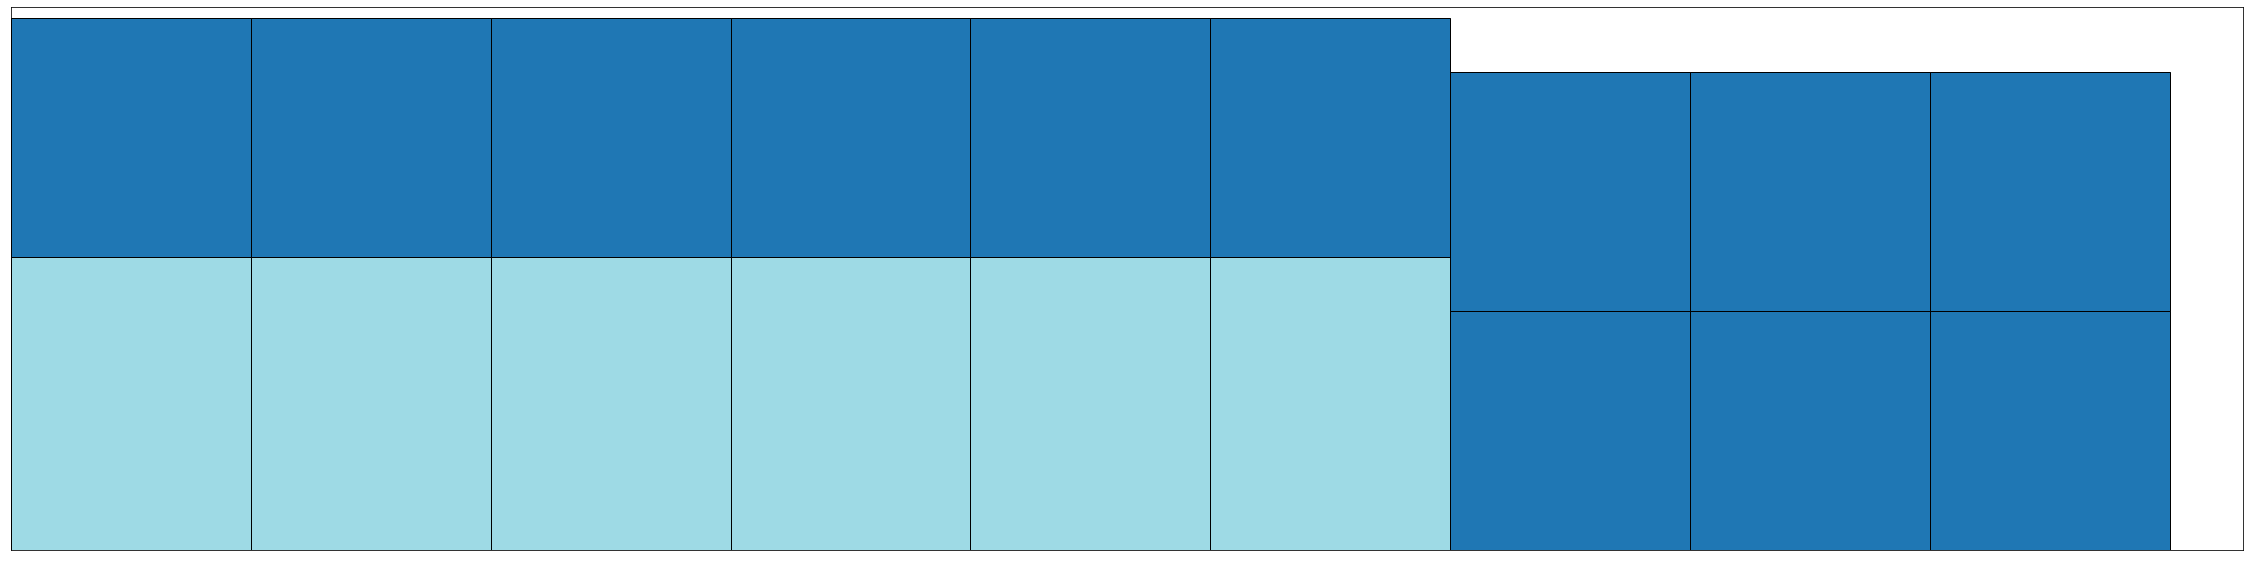

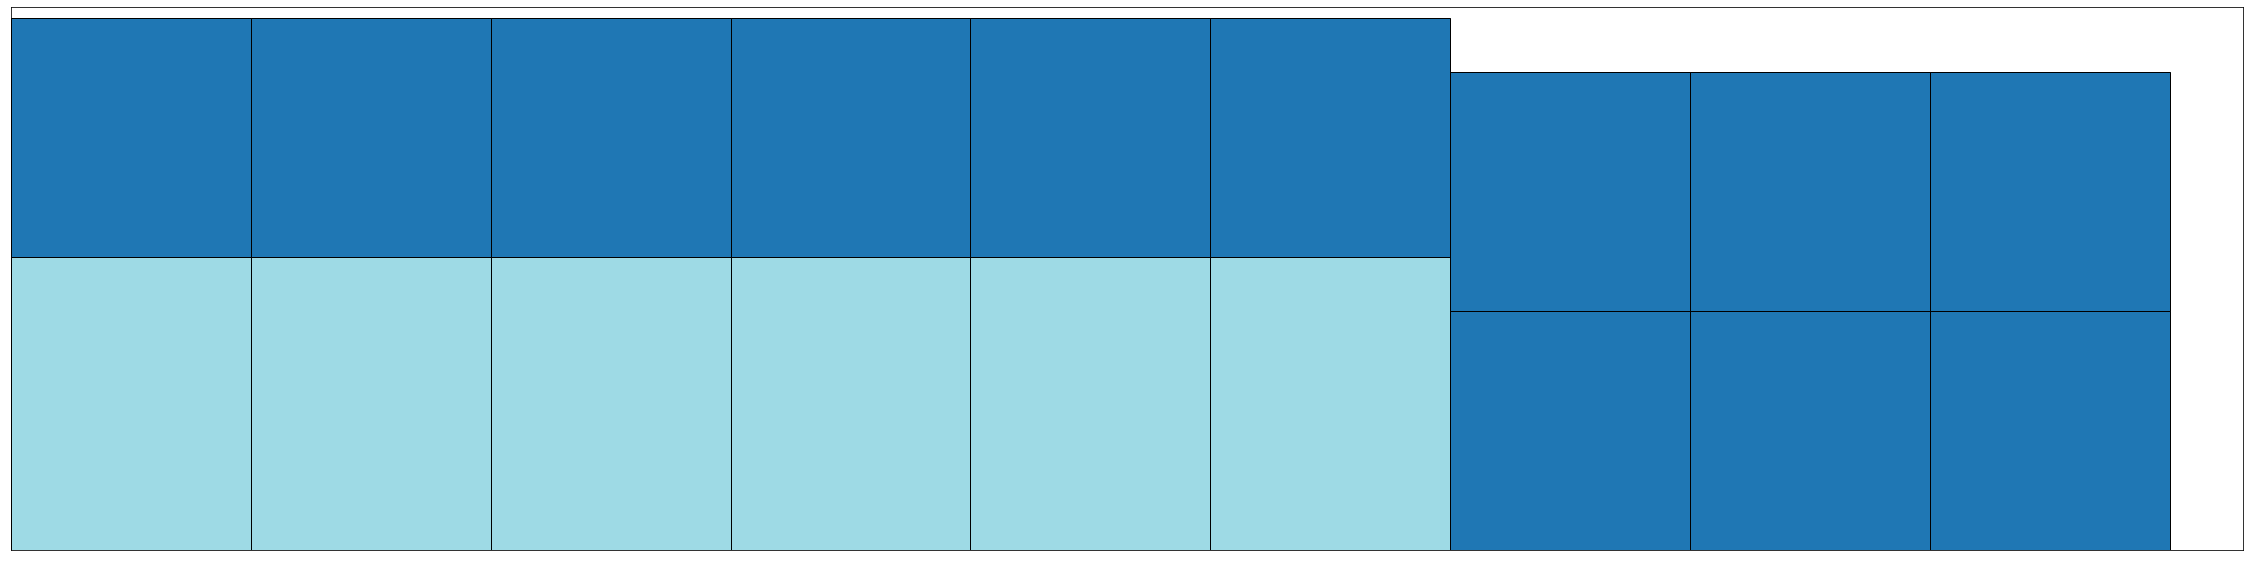

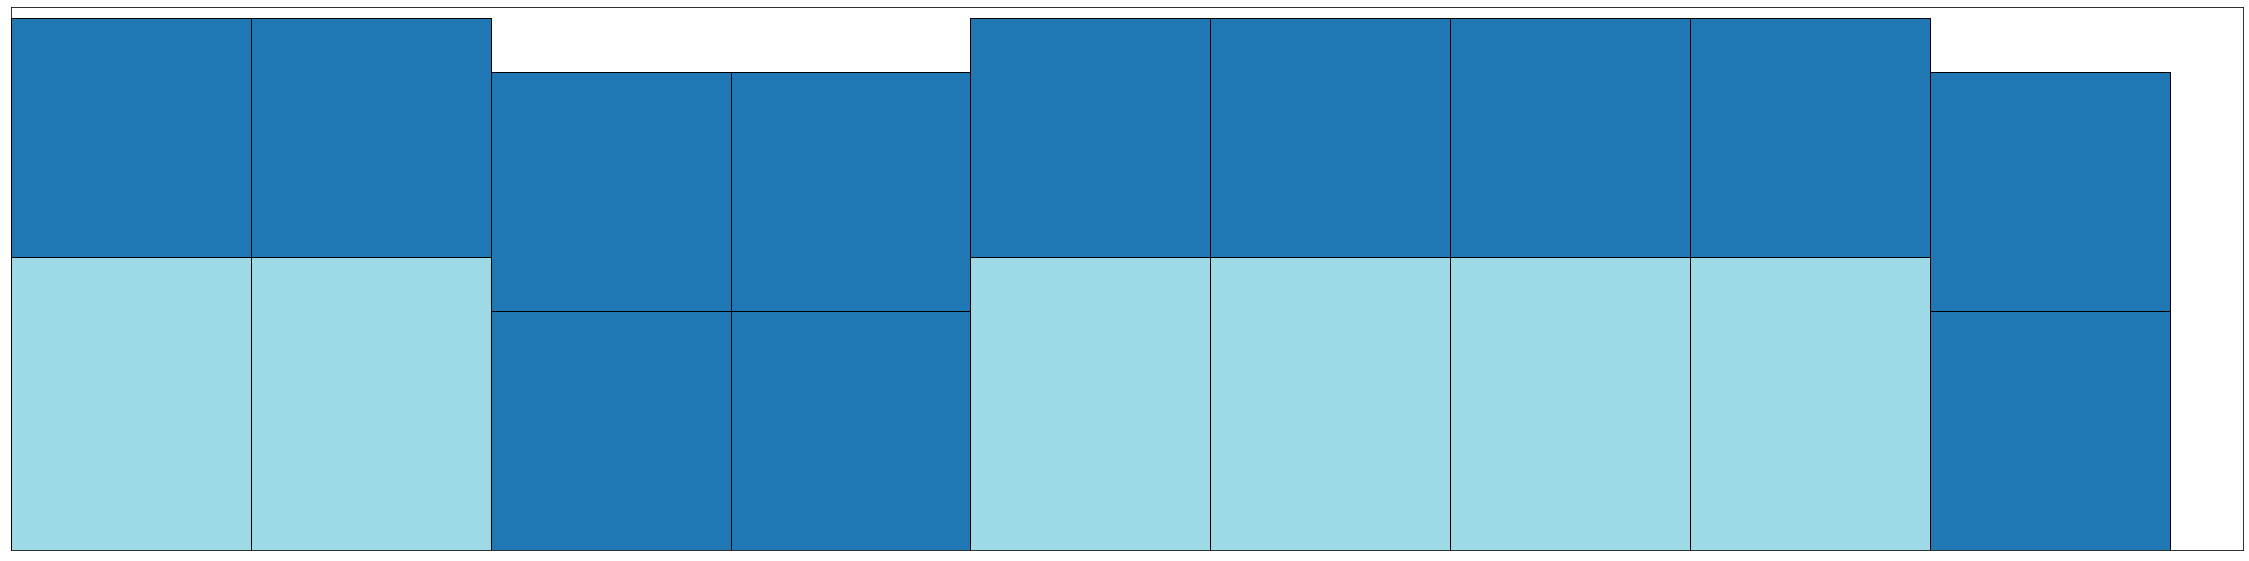

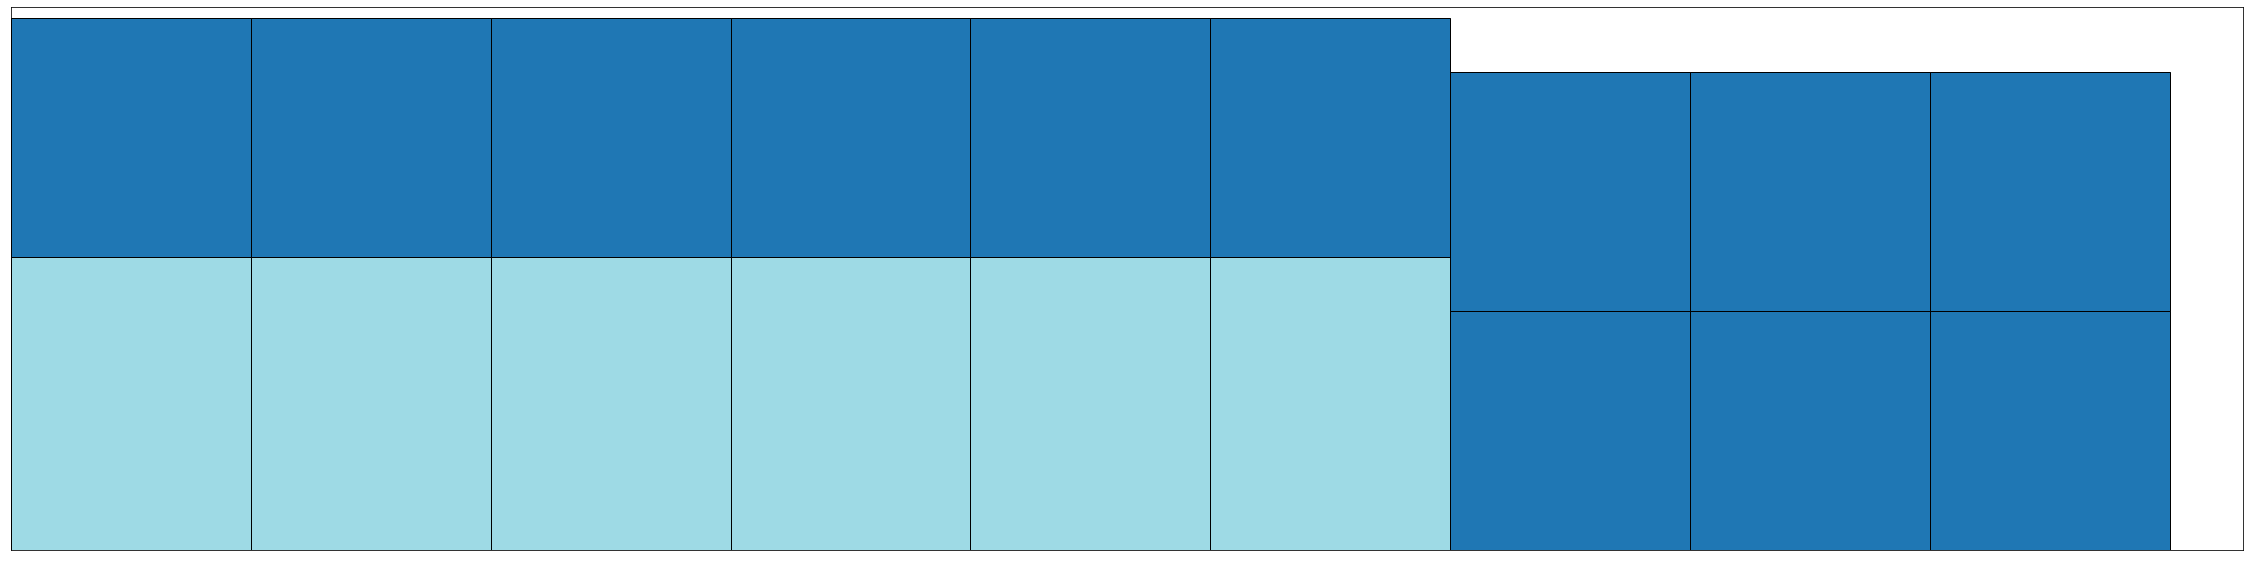

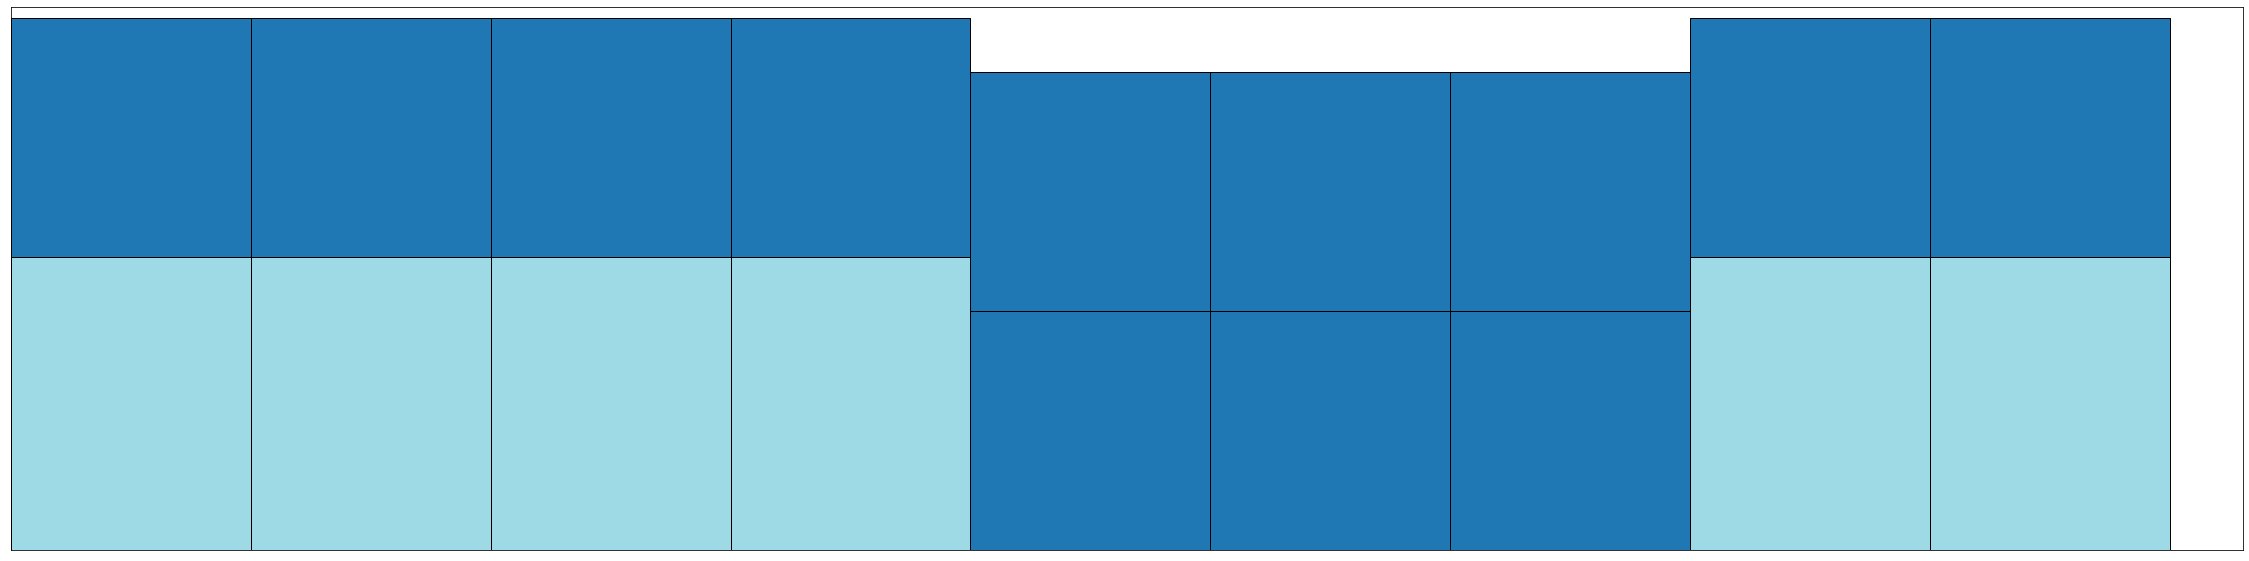

In [14]:
for nr_item_type in nr_item_types:
    for problem in problems:

        x, y = problem

        file_name = str(nr_item_type) + "_" + str(x) + "_" + str(y) 

        f = open(os.path.join(os.getcwd(), "problems", file_name + ".json"))
        data = json.load(f)
        
        run_multi_bin_benchmark(solver_models, production_models, single_bin_models, ProblemJsonM.init_from_file(data), args=args)